In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import mixture

In [2]:
green_df = pd.read_csv("./clean_data/clean_green.csv")

In [3]:
green_df.head(4)

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
0,0.344647,0.003080,0.047522,0.288216,0.178585,0.016564,0.0,0.043500,0.010149,0.000133,...,85.474311,0.265933,0.346294,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.165329,0.000000,0.048236,0.504736,0.502783,0.007012,0.0,0.097405,0.973837,0.004055,...,124.794129,1.000000,0.283059,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.457010,0.001681,0.242888,0.212859,0.000000,0.000000,0.0,0.000000,0.000000,0.001756,...,94.948697,0.518740,0.419375,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.513244,0.005711,0.213781,0.251819,0.079795,0.000000,0.0,0.017594,0.007208,0.001288,...,74.221670,0.347202,0.361672,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [4]:
green_df = pd.get_dummies(green_df)

In [5]:
green_df.head(4)

,cervix_area,os_area,walls_area,speculum_area,artifacts_area,cervix_artifacts_area,os_artifacts_area,walls_artifacts_area,speculum_artifacts_area,cervix_specularities_area,...,fit_ellipse_goodness,dist_to_center_cervix,dist_to_center_os,experts::0,experts::1,experts::2,experts::3,experts::4,experts::5,consensus
0,0.344647,0.003080,0.047522,0.288216,0.178585,0.016564,0.0,0.043500,0.010149,0.000133,...,85.474311,0.265933,0.346294,1.0,0.0,0.0,1.0,1.0,1.0,1.0
1,0.165329,0.000000,0.048236,0.504736,0.502783,0.007012,0.0,0.097405,0.973837,0.004055,...,124.794129,1.000000,0.283059,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.457010,0.001681,0.242888,0.212859,0.000000,0.000000,0.0,0.000000,0.000000,0.001756,...,94.948697,0.518740,0.419375,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.513244,0.005711,0.213781,0.251819,0.079795,0.000000,0.0,0.017594,0.007208,0.001288,...,74.221670,0.347202,0.361672,1.0,1.0,0.0,1.0,1.0,1.0,1.0


In [6]:
X = green_df = green_df.drop(columns=['experts::0','experts::1','experts::2','experts::3','experts::4','experts::5','consensus'], axis=1)


In [7]:
print(type(X))
X = X.as_matrix()

<class 'pandas.core.frame.DataFrame'>


c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [8]:
print(type(X))

<class 'numpy.ndarray'>


In [9]:
print(X)

[[3.44646644e-01 3.07978844e-03 4.75217078e-02 ... 8.54743113e+01
  2.65933125e-01 3.46293521e-01]
 [1.65329348e-01 0.00000000e+00 4.82355966e-02 ... 1.24794129e+02
  1.00000000e+00 2.83059065e-01]
 [4.57010481e-01 1.68118335e-03 2.42887859e-01 ... 9.49486971e+01
  5.18739791e-01 4.19375125e-01]
 ...
 [6.87017067e-01 8.68402906e-03 1.16932366e-01 ... 1.01015352e+02
  4.41084715e-01 6.14335555e-01]
 [6.72300500e-01 3.40851466e-03 0.00000000e+00 ... 2.53669174e+02
  3.52804623e-01 5.87677486e-01]
 [5.20795181e-01 6.00609047e-03 2.13452840e-01 ... 2.26501623e+02
  2.94868564e-01 4.50687667e-01]]


In [10]:
X.shape

(98, 62)

In [11]:
print(X[1,:])

[1.65329348e-01 0.00000000e+00 4.82355966e-02 5.04735893e-01
 5.02782960e-01 7.01231567e-03 0.00000000e+00 9.74045109e-02
 9.73837317e-01 4.05511824e-03 0.00000000e+00 0.00000000e+00
 5.49992392e-02 2.84305202e-02 0.00000000e+00 5.95058821e+01
 2.43618774e+01 3.51440047e+01 8.38677596e+01 1.22366075e+02
 4.47424069e+01 7.76236685e+01 1.67108482e+02 7.80584341e+01
 3.08187286e+01 4.72397056e+01 1.08877163e+02 5.49324672e+01
 3.94474153e+01 1.54850519e+01 9.43798825e+01 1.01680459e+02
 4.60288520e+01 5.56516070e+01 1.47709311e+02 6.32189306e+01
 4.39259119e+01 1.92930187e+01 1.07144843e+02 4.94438189e+00
 2.96510802e+00 1.30260492e+02 2.41438675e+01 1.22366647e+02
 4.47439317e+01 5.08006335e+00 2.89416256e+00 1.28251978e+02
 3.30006930e+01 1.01725519e+02 4.60935105e+01 8.50860593e-01
 1.94308386e-01 6.46644677e-01 2.55672634e-01 4.97315365e-01
 3.32443676e-01 8.94624936e-01 1.84802973e-01 1.24794129e+02
 1.00000000e+00 2.83059065e-01]


In [12]:
print(X[:4,:])

[[3.44646644e-01 3.07978844e-03 4.75217078e-02 2.88215582e-01
  1.78584943e-01 1.65638804e-02 0.00000000e+00 4.34998329e-02
  1.01493804e-02 1.33237528e-04 0.00000000e+00 0.00000000e+00
  8.58331208e-02 2.49069357e-02 2.63560376e-01 3.75944577e+01
  1.57850211e+01 2.18094366e+01 5.33794789e+01 1.09918445e+02
  3.87354207e+01 7.11830239e+01 1.48653865e+02 5.50296178e+01
  2.21603304e+01 3.28692874e+01 7.71899482e+01 3.85613673e+01
  3.81190589e+01 4.42308395e-01 7.66804262e+01 9.51097546e+01
  5.15650522e+01 4.35447024e+01 1.46674807e+02 4.88084744e+01
  4.07652275e+01 8.04324681e+00 8.95737019e+01 5.01462752e+00
  2.99194386e+00 1.67952780e+02 2.58131634e+01 1.09919447e+02
  3.87337405e+01 5.09080064e+00 2.93664998e+00 1.59486916e+02
  3.84372937e+01 9.51238887e+01 5.15830295e+01 9.23066594e-01
  3.73371375e-01 8.44453818e-01 4.08129653e-01 6.03399080e-01
  5.71175289e-01 9.62995322e-01 3.57890258e-01 8.54743113e+01
  2.65933125e-01 3.46293521e-01]
 [1.65329348e-01 0.00000000e+00 4.823

In [13]:
print(X[0:2,0:2])

[[0.34464664 0.00307979]
 [0.16532935 0.        ]]


In [14]:
print(X[0:2,:])

[[3.44646644e-01 3.07978844e-03 4.75217078e-02 2.88215582e-01
  1.78584943e-01 1.65638804e-02 0.00000000e+00 4.34998329e-02
  1.01493804e-02 1.33237528e-04 0.00000000e+00 0.00000000e+00
  8.58331208e-02 2.49069357e-02 2.63560376e-01 3.75944577e+01
  1.57850211e+01 2.18094366e+01 5.33794789e+01 1.09918445e+02
  3.87354207e+01 7.11830239e+01 1.48653865e+02 5.50296178e+01
  2.21603304e+01 3.28692874e+01 7.71899482e+01 3.85613673e+01
  3.81190589e+01 4.42308395e-01 7.66804262e+01 9.51097546e+01
  5.15650522e+01 4.35447024e+01 1.46674807e+02 4.88084744e+01
  4.07652275e+01 8.04324681e+00 8.95737019e+01 5.01462752e+00
  2.99194386e+00 1.67952780e+02 2.58131634e+01 1.09919447e+02
  3.87337405e+01 5.09080064e+00 2.93664998e+00 1.59486916e+02
  3.84372937e+01 9.51238887e+01 5.15830295e+01 9.23066594e-01
  3.73371375e-01 8.44453818e-01 4.08129653e-01 6.03399080e-01
  5.71175289e-01 9.62995322e-01 3.57890258e-01 8.54743113e+01
  2.65933125e-01 3.46293521e-01]
 [1.65329348e-01 0.00000000e+00 4.823

In [15]:
from sklearn.cluster import KMeans

In [16]:
cluster_range = range( 1, 20 )
cluster_errors = []

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform( X )

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( X_scaled )
  cluster_errors.append( clusters.inertia_ )

In [17]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

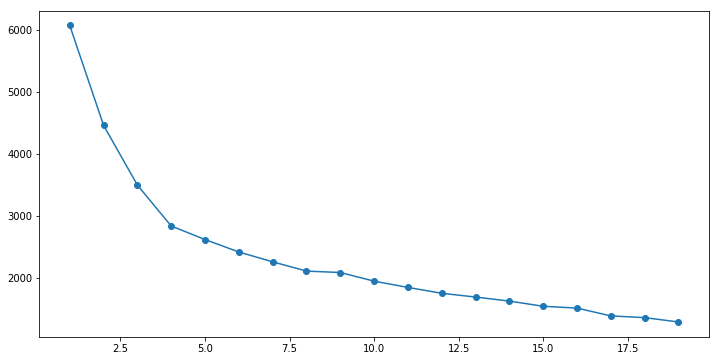

In [18]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [19]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [20]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 2, 2, 2, 1, 2, 0,
       0, 0, 1, 2, 1, 2, 3, 0, 2, 2, 2, 1, 2, 3, 2, 3, 3, 3, 0, 1, 0, 2,
       2, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 2, 2, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 0])

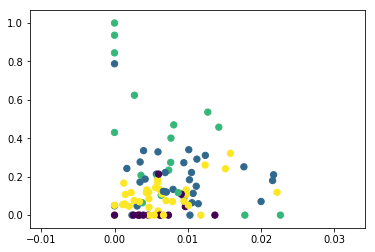

In [21]:
plt.scatter(X[:, 1], X[:, 2], c=kmeans.labels_, s=40, cmap='viridis');

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(X)

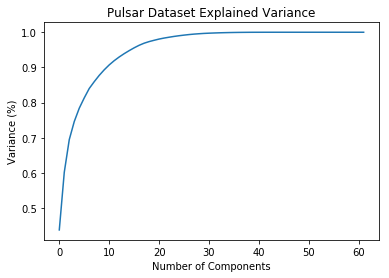

In [24]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [25]:
pca = PCA(n_components=25)
dataset = pca.fit_transform(data_rescaled)

In [26]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( dataset )
  cluster_errors.append( clusters.inertia_ )

In [27]:
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

In [28]:
clusters_df_pca = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

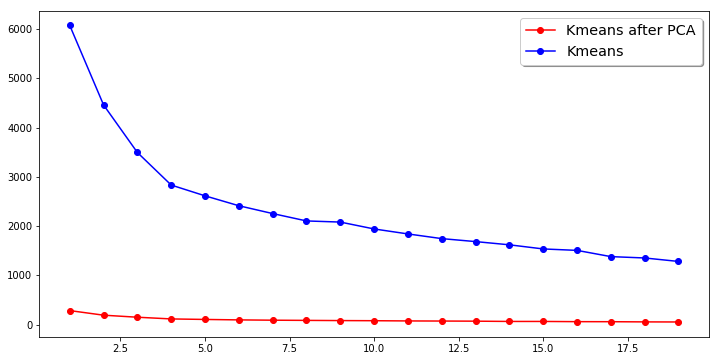

In [43]:
# Create plots with pre-defined labels.
fig, ax = plt.subplots(figsize=(12,6))
ax.plot( clusters_df_pca.num_clusters, clusters_df_pca.cluster_errors, marker = "o" , color= "red", label= 'Kmeans after PCA')
ax.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o",color= "blue",label='Kmeans')
        

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
#legend.get_frame().set_facecolor('C0')

plt.show()

In [44]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(dataset)

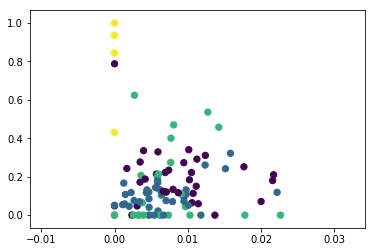

In [45]:
plt.scatter(X[:, 1], X[:, 2], c=kmeans.labels_, s=40, cmap='viridis');

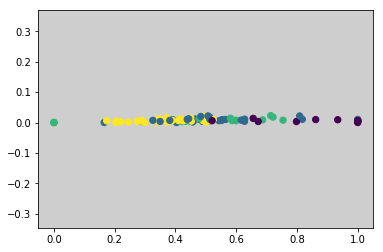

In [46]:
plot_kmeans(kmeans, X)

In [47]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(62,2))

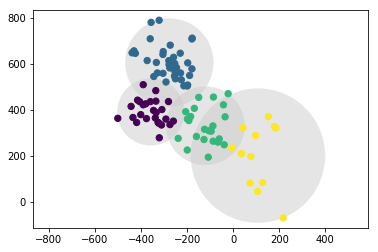

In [48]:
plot_kmeans(kmeans, X_stretched)

In [49]:
gmm =  mixture.GaussianMixture(n_components=4).fit(X)

In [50]:
labels = gmm.predict(X)

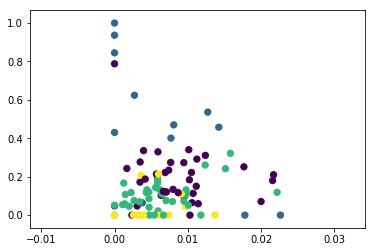

In [51]:
plt.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis');

In [52]:
probs = gmm.predict_proba(X)

In [53]:
print(probs[:5].round(3))

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [54]:
print(probs[5:10].round(3))

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [55]:
print(probs[150:155].round(3))

[]


In [56]:
print(probs[75:80].round(3))

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [57]:
size = 50 * probs.max(1)

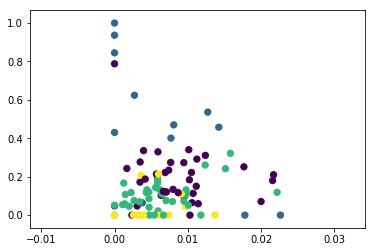

In [58]:
plt.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis');

In [60]:
gmm = mixture.GaussianMixture(n_components=4, covariance_type='full', random_state=42)

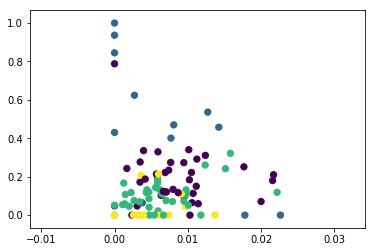

In [61]:
plt.scatter(X[:, 1], X[:, 2], c=labels, s=40, cmap='viridis');

In [62]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

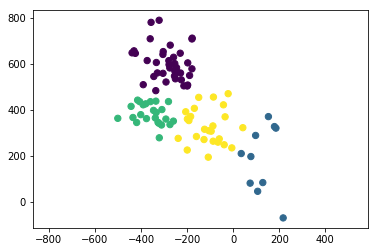

In [63]:
plot_gmm(gmm, X_stretched)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

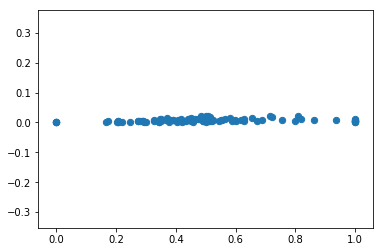

In [64]:
plot_gmm(gmm, X, label=False)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

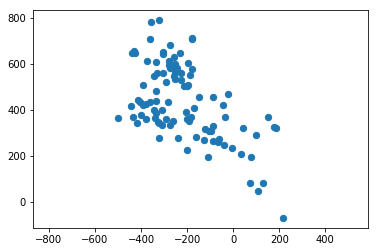

In [65]:
plot_gmm(gmm, X_stretched, label=False)

AttributeError: 'GaussianMixture' object has no attribute 'covars_'

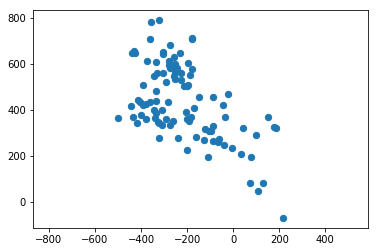

In [78]:
gmm16 = mixture.GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, X_stretched, label=False)

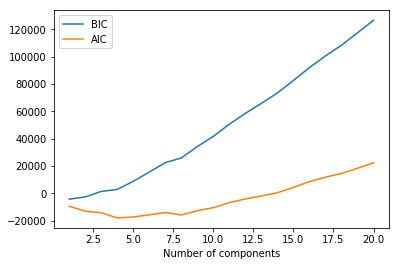

In [67]:
n_components = np.arange(1, 21)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number of components');

### Modelos de mistura para as ALP